# Session 1 - Your "first" DataScience problem

In [221]:
# some imports

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# create output folder
if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

C:\Users\guill\AppData\Local\Temp\ipykernel_17216\2676058113.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [222]:
## load data
train_set = pd.read_csv('dataset/housing-snapshot/train_set.csv',index_col=0) 
test_set = pd.read_csv('dataset/housing-snapshot/test_set.csv',index_col=0) 


## The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features

In [223]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [224]:
# print the top elements from the dataset
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [225]:
train_set_cleaned = train_set.copy()
# Verifica si hay valores NaN en cada columna
nan_columns = train_set_cleaned.isna().sum()

# Filtra las columnas que tienen al menos un NaN
columns_with_nan = nan_columns[nan_columns > 0]

print("Columns with NaN values:")
print(columns_with_nan)


Columns with NaN values:
Car               25
BuildingArea    2542
YearBuilt       2130
CouncilArea      553
dtype: int64


In [226]:
test_set_cleaned = test_set.copy()

# Selecciona solo las columnas numéricas
numeric_cols_train = train_set_cleaned.select_dtypes(include=[np.number]).columns
numeric_cols_test = test_set_cleaned.select_dtypes(include=[np.number]).columns

# Llena los valores faltantes con la media de cada columna numérica
for col in numeric_cols_train:
    mean_value = train_set_cleaned[col].mean()
    train_set_cleaned[col].fillna(mean_value, inplace=True)

for col in numeric_cols_test:
    mean_value = test_set_cleaned[col].mean()
    test_set_cleaned[col].fillna(mean_value, inplace=True)



In [227]:
train_set_cleaned = train_set_cleaned.dropna(subset=['CouncilArea'])
test_set_cleaned = test_set_cleaned.dropna(subset=['CouncilArea'])

# Verifica si hay valores NaN en cada columna
nan_columns = train_set_cleaned.isna().sum()

# Filtra las columnas que tienen al menos un NaN
columns_with_nan = nan_columns[nan_columns > 0]

print(columns_with_nan)

Series([], dtype: int64)


In [228]:
def change_dtypes(to_change):
    
    for column in to_change:
        train_set_cleaned[column] = train_set_cleaned[column].astype(int)
        test_set_cleaned[column] = test_set_cleaned[column].astype(int)


to_change = ['Bedroom2','Bathroom','Car','YearBuilt']
change_dtypes(to_change)
print(train_set_cleaned.dtypes)

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2           int32
Bathroom           int32
Car                int32
Landsize         float64
BuildingArea     float64
YearBuilt          int32
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


In [229]:
def normalize_df(df):
    columns_to_normalize = []
    for col in df.columns:
        if df[col].dtype == 'float64' and col != 'Price':
            columns_to_normalize.append(col)

    df[columns_to_normalize] = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

normalize_df(train_set_cleaned)
normalize_df(test_set_cleaned)

In [230]:
train_set_cleaned.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,0.158228,0.040942,4,2,2,0.010200,0.023927,1965,Moonee Valley,0.577464,0.369052,Western Metropolitan,0.054278
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,0.116034,0.071648,2,1,1,0.002517,0.023927,1965,Darebin,0.548127,0.457357,Northern Metropolitan,0.516203
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,0.194093,0.106448,3,1,4,0.008056,0.016937,1950,Boroondara,0.522112,0.535814,Southern Metropolitan,0.348996
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,0.109705,0.057318,3,1,1,0.004314,0.023927,1930,Moreland,0.564244,0.423007,Northern Metropolitan,0.542260
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,0.291139,0.109519,4,3,2,0.009694,0.024006,1970,Manningham,0.560427,0.569453,Eastern Metropolitan,0.236630


In [231]:
train_set_convertido = train_set_cleaned.copy()
test_set_convertido = test_set_cleaned.copy()

def convertir(df):

    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

    # Extraer el año y guardarlo en una nueva columna 'YearSold' usando .loc
    df['YearSold'] = df['Date'].dt.year

    # Extraer el año y guardarlo en una nueva columna 'YearSold' usando .loc
    df['MonthSold'] = df['Date'].dt.month

    features = ['Type', 'Method', 'SellerG', 'Regionname', 'CouncilArea', 'Suburb']

    def convertir_objetos_a_numeros(features):

        for feature in features:
            # Paso 1: Contar las apariciones de cada tipo
            feature_counts = df[feature].value_counts()

            # Paso 2: Crear un mapeo basado en la aparición
            # Asignar un número a cada tipo según el orden de aparición
            feature_mapping = {feature_name: idx for idx, feature_name in enumerate(feature_counts.index)}

            # Paso 3: Reemplazar los valores de la columna 'Type' con el número asignado
            df[feature] = df[feature].map(feature_mapping)

    convertir_objetos_a_numeros(features)
    
convertir(train_set_convertido)
convertir(test_set_convertido)    

train_set_convertido.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,YearSold,MonthSold
index,,,,,,,,,,,,,,,,,,,,,,,
0,87,241 Buckley St,4,0,1380000.0,3,0,2017-08-12,0.158228,0.040942,4,2,2,0.010200,0.023927,1965,3,0.577464,0.369052,2,0.054278,2017,8
1,11,67 Charles St,2,0,1100000.0,1,1,2017-05-20,0.116034,0.071648,2,1,1,0.002517,0.023927,1965,2,0.548127,0.457357,1,0.516203,2017,5
2,12,42 Maud St,3,0,1480000.0,2,1,2016-10-15,0.194093,0.106448,3,1,4,0.008056,0.016937,1950,0,0.522112,0.535814,0,0.348996,2016,10
3,5,13 Percy St,3,0,1055000.0,0,0,2016-05-07,0.109705,0.057318,3,1,1,0.004314,0.023927,1930,1,0.564244,0.423007,1,0.542260,2016,5
4,58,253 Thompsons Rd,4,0,1000000.0,3,2,2016-08-13,0.291139,0.109519,4,3,2,0.009694,0.024006,1970,16,0.560427,0.569453,3,0.236630,2016,8


In [232]:
# we can see the type of each features as follows
train_set_cleaned.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2           int32
Bathroom           int32
Car                int32
Landsize         float64
BuildingArea     float64
YearBuilt          int32
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [233]:
# print those categorical features
train_set_cleaned.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [234]:
# We can check how many different type there is in the dataset using the folliwing line
train_set_cleaned["Type"].value_counts()

Type
h    3261
u    1164
t     454
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Type'>

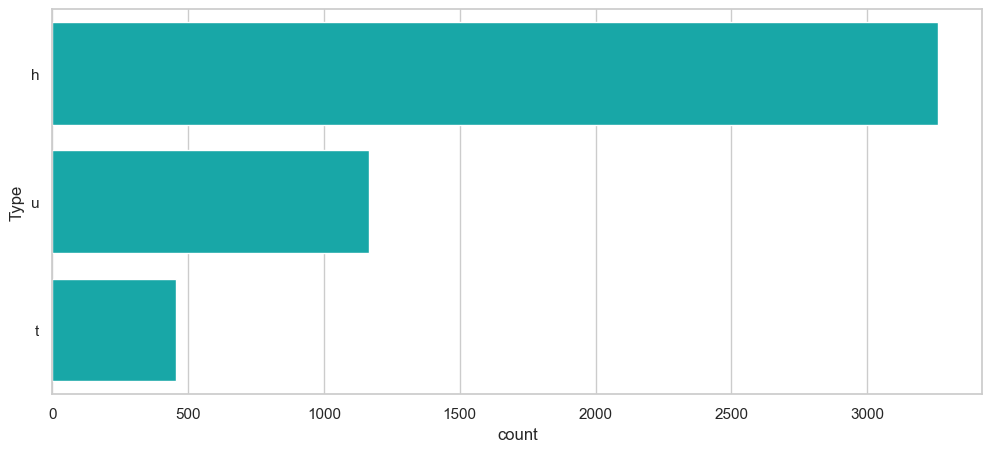

In [235]:
sns.countplot(y="Type", data=train_set_cleaned, color="c")

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html
+ Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased)

Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

c:\Users\guill\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


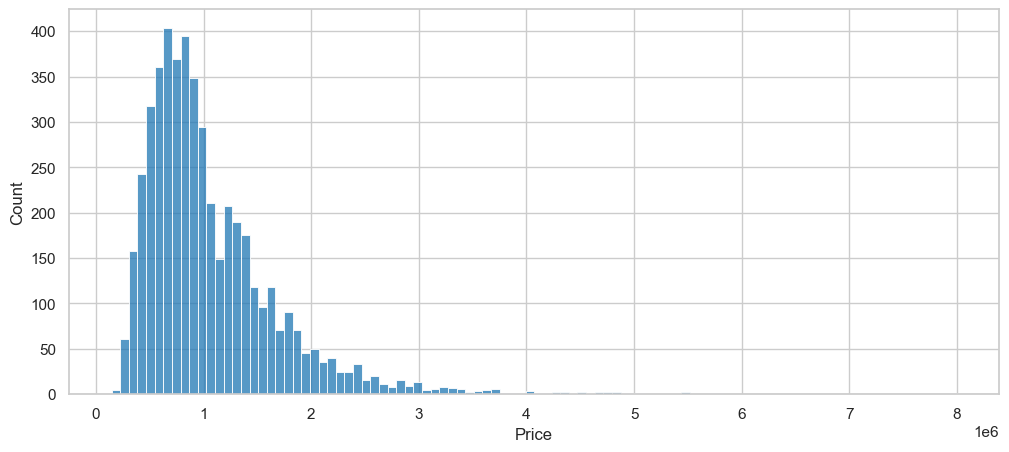

In [236]:
sns.histplot(train_set_cleaned["Price"])
plt.show()

## BASELINE MODEL
### https://www.kaggle.com/t/dd6d7e5591dc4101a895872672dfdfa9

This is a simple model that uses the K-nearest Neighbors Regressor

This model only uses 4 feaures: 'Rooms','Landsize', 'BuildingArea', 'YearBuilt'

----- EVALUATION ON TRAIN SET ------
RMSE 386197.084485071
R^2:  0.6392923538465749


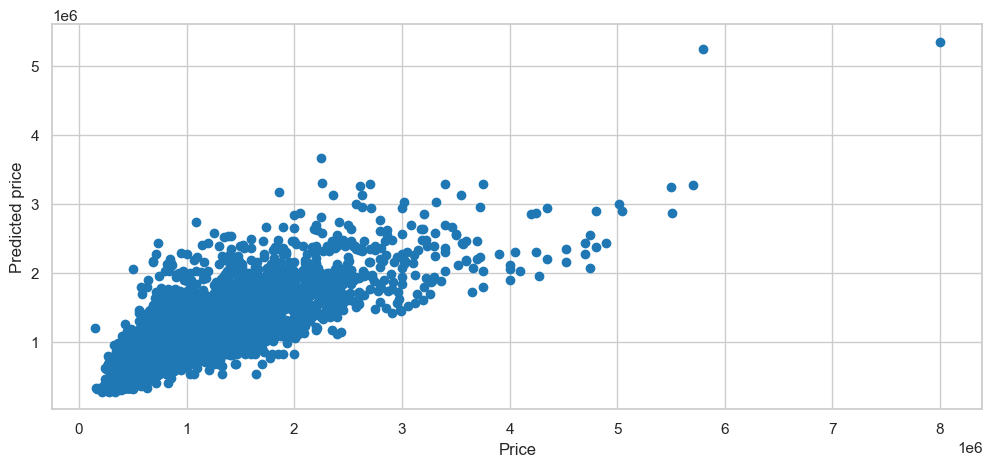

In [237]:

## the features

features = ['Rooms','Landsize', 'BuildingArea', 'YearBuilt']
## DEFINE YOUR FEATURES
X = train_set_convertido[features].fillna(0)
y = train_set_convertido[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
X_test = test_set_convertido[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/baseline.csv',index=False)


## EXERCICE - TRAIN A MODEL and upload your best solution to the Kaggle Challenge

Tasks: 
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


In [238]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Definir las características (X) y el objetivo (y)
features = ['Rooms','Landsize', 'BuildingArea', 'YearBuilt', 'YearSold', 'Type', 'Method','CouncilArea','Postcode','Car','Bedroom2','Bathroom','SellerG','Lattitude','Longtitude','Suburb','Propertycount','Regionname','MonthSold']
X = train_set_convertido[features]
y = train_set_convertido['Price']  # Objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar SelectKBest con la prueba de correlación f_regression
selector = SelectKBest(score_func=f_regression, k=11)
selector = selector.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Mostrar los scores de características
print("Scores de características:", selector.scores_)


Características seleccionadas: Index(['Rooms', 'BuildingArea', 'YearBuilt', 'Type', 'CouncilArea', 'Car',
       'Bedroom2', 'Bathroom', 'Lattitude', 'Longtitude', 'Regionname'],
      dtype='object')
Scores de características: [1.29755728e+03 1.16735701e+01 1.69881203e+02 2.92075693e+02
 1.70651218e-01 4.13164061e+02 4.12093565e+00 7.11284638e+01
 4.89205136e+01 2.64974269e+02 1.03855212e+03 1.04472424e+03
 1.41261870e+01 1.67591723e+02 1.53057427e+02 6.01933027e+01
 3.58895158e+00 2.21011748e+02 3.64908176e-01]


----- EVALUATION ON TRAIN SET ------
RMSE 241122.65256086114
R^2:  0.8593909118034083


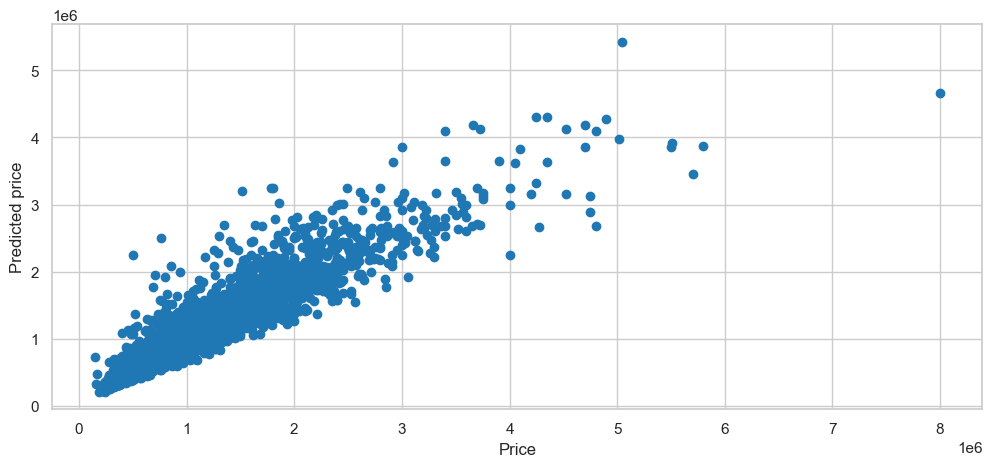

In [240]:


features = selected_features
## DEFINE YOUR FEATURES
X = train_set_convertido[features]
y = train_set_convertido[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 2 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)


## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price')
plt.show()

## predict the test set and generate the submission file
X_test = test_set_convertido[features]
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/baseline.csv',index=False)

Explain the choosed model and why you think that is is the best

KNeighborsRegressor in this case is working better since the relations between characteristics and the objective are not linear and more complex. I normalized most of the data and used 'n_neighbors = 2' since it gives the best results without overfitting. Also I used a selector to get the best of the parameters. I tried the LinearRegressor but the results were far less acceptable.

----- EVALUATION ON TRAIN SET USING LINEAR REGRESSION------


RMSE 445198.6520235395

R^2:  0.5206584805887715

----- EVALUATION ON TRAIN SET USING KNN with n = 2------


RMSE 241122.65256086114

R^2:  0.8593909118034083

----- EVALUATION ON TRAIN SET USING KNN with n = 3------


RMSE 291780.3722667814

R^2:  0.7941032389321265